In [12]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 2019 Summer Patterns

patterns path: SafeGraph/2020/monthly/Aug19-AllPatterns-PATTERNS-2019_08-2020-03-23.zip

unzip SafeGraph/2020/monthly/Aug19-AllPatterns-PATTERNS-2019_08-2020-03-23.zip -d meiliu/2019_August_monthly_Patterns

### 2019 POI info

In [9]:
# Codes	Titles	Total Marketable US Businesses
# 71	Arts, Entertainment, and Recreation	380,467
# 7111	Performing Arts Companies	36,499
# 711110	Theater Companies and Dinner Theaters	3,387
# 711120	Dance Companies	149
# 711130	Musical Groups and Artists	9,305
# 711190	Other Performing Arts Companies	23,658
# 7112	Spectator Sports	25,342
# 711211	Sports Teams and Clubs	5,991
# 711212	Racetracks	4,363
# 711219	Other Spectator Sports	14,988
# 7113	Promoters of Performing Arts, Sports, and Similar Events	12,210
# 711310	Promoters of Performing Arts, Sports, and Similar Events with Facilities	9,442
# 711320	Promoters of Performing Arts, Sports, and Similar Events without Facilities	2,768
# 7114	Agents and Managers for Artists, Athletes, Entertainers, and Other Public Figures	9,562
# 711410	Agents and Managers for Artists, Athletes, Entertainers, and Other Public Figures	9,562
# 7115	Independent Artists, Writers, and Performers	53,270
# 711510	Independent Artists, Writers, and Performers	53,270
# 7121	Museums, Historical Sites, and Similar Institutions	41,873
# 712110	Museums	27,240
# 712120	Historical Sites	3,257
# 712130	Zoos and Botanical Gardens	1,904
# 712190	Nature Parks and Other Similar Institutions	9,472
# 7131	Amusement Parks and Arcades	4,603
# 713110	Amusement and Theme Parks	2,236
# 713120	Amusement Arcades	2,367
# 7132	Gambling Industries	1,044
# 713210	Casinos (except Casino Hotels)	564
# 713290	Other Gambling Industries	480
# 7139	Other Amusement and Recreation Industries	196,064
# 713910	Golf Courses and Country Clubs	16,429
# 713920	Skiing Facilities	293
# 713930	Marinas	7,204
# 713940	Fitness and Recreational Sports Centers	140,084
# 713950	Bowling Centers	4,945
# 713990	All Other Amusement and Recreation Industries	27,109


In [17]:
## Get all entertainment & recreation POIs in Chicago

#place_categories = ['712190','713110','721211','712130'] # parks
place_categories = ['7112', '7113', '7114', '7115', '7121', '7131', '7132', '7139'] # exclude the companies in entertainment industry

path = '/media/raid/SafeGraph/2020/poi/2020/04/' # contains files such as core_poi-part1.csv.gz 
poi_df = None
for filename in os.listdir(path):
    if '.csv.gz' in filename: 
        df = pd.read_csv(path + '/' + filename, compression = 'gzip', dtype = {"poi_cbg": "str", "naics_code":"str"})
        print(filename, df.shape, df.columns)
        chicago_df = df.loc[(df['city'] == 'Chicago') & (df['region'] == 'IL') & (df['naics_code'].str.startswith(tuple(place_categories), na = False))] 
        print(chicago_df.shape)
        poi_df = pd.concat([poi_df, chicago_df]).drop_duplicates()

print(poi_df.shape)
poi_df

core_poi-part3.csv.gz (1080275, 18) Index(['safegraph_place_id', 'parent_safegraph_place_id', 'location_name',
       'safegraph_brand_ids', 'brands', 'top_category', 'sub_category',
       'naics_code', 'latitude', 'longitude', 'street_address', 'city',
       'region', 'postal_code', 'iso_country_code', 'phone_number',
       'open_hours', 'category_tags'],
      dtype='object')
(815, 18)
core_poi-part1.csv.gz (1083830, 18) Index(['safegraph_place_id', 'parent_safegraph_place_id', 'location_name',
       'safegraph_brand_ids', 'brands', 'top_category', 'sub_category',
       'naics_code', 'latitude', 'longitude', 'street_address', 'city',
       'region', 'postal_code', 'iso_country_code', 'phone_number',
       'open_hours', 'category_tags'],
      dtype='object')
(859, 18)
core_poi-part4.csv.gz (1081724, 18) Index(['safegraph_place_id', 'parent_safegraph_place_id', 'location_name',
       'safegraph_brand_ids', 'brands', 'top_category', 'sub_category',
       'naics_code', 'latitud

,safegraph_place_id,parent_safegraph_place_id,location_name,safegraph_brand_ids,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,iso_country_code,phone_number,open_hours,category_tags
151,sg:0a65e70da6f24a91a580edbdaa02d240,NaN,Cumnor Court Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,42.177841,-87.837169,Cumnor Court,Chicago,IL,60015,US,NaN,NaN,NaN
1153,sg:52728f635cf647d3b25109ae6694a5ca,NaN,Stonebridge Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.483524,-87.992586,Neslon Rd,Chicago,IL,60451,US,NaN,NaN,NaN
1174,sg:542798da4f794b84ac495b8532cadd4a,NaN,Feinberg Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,42.232491,-88.293767,Feinberg Park,Chicago,IL,60014,US,NaN,NaN,NaN
1895,sg:8baab86f57d94678b6c1055c603ad4e4,NaN,Metro South Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.657446,-87.679754,Unknown,Chicago,IL,60406,US,NaN,NaN,NaN
1933,sg:8edd937db94944b6a1e81edb2e16d77e,NaN,Chicago Park District,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.954882,-87.767330,4101 N Central Ave,Chicago,IL,60634,US,1.773686e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074637,sg:18e899c37bc24c99bccf7d1ba39402e8,NaN,Kick 55 Fitness,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.890161,-87.631374,108 W Hubbard St,Chicago,IL,60654,US,1.312723e+10,"{ ""Mon"": [[""5:30"", ""19:30""]], ""Tue"": [[""5:30"",...",NaN
1074726,sg:1f247b865f8e445da31bea83ec016bd8,NaN,Darien Community Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.757720,-87.956269,7100 Clarendon Hills Road,Chicago,IL,60561,US,NaN,NaN,NaN
1076660,sg:b134a342689c4e3cb356380953377879,NaN,Chicago Park District Altgeld Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.874400,-87.692283,515 S Washtenaw Ave,Chicago,IL,60612,US,1.312747e+10,NaN,NaN
1077026,sg:d19cd849b4ed445dbc2ba339eaa6e537,NaN,Donald L Perillo Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.649253,-87.688760,Unknown,Chicago,IL,60406,US,NaN,NaN,NaN


In [18]:
# save to meiliu/poi_seg_entertainment/chicago/poi.ipynb
poi_df.to_csv('/media/raid/meiliu/poi_seg_entertainment/chicago/entertainment_poi.csv', columns=['safegraph_place_id','location_name', 'naics_code', 'latitude',
       'longitude', 'street_address', 'city', 'region', 'postal_code'], index=False)
poi_df

,safegraph_place_id,parent_safegraph_place_id,location_name,safegraph_brand_ids,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,iso_country_code,phone_number,open_hours,category_tags
151,sg:0a65e70da6f24a91a580edbdaa02d240,NaN,Cumnor Court Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,42.177841,-87.837169,Cumnor Court,Chicago,IL,60015,US,NaN,NaN,NaN
1153,sg:52728f635cf647d3b25109ae6694a5ca,NaN,Stonebridge Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.483524,-87.992586,Neslon Rd,Chicago,IL,60451,US,NaN,NaN,NaN
1174,sg:542798da4f794b84ac495b8532cadd4a,NaN,Feinberg Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,42.232491,-88.293767,Feinberg Park,Chicago,IL,60014,US,NaN,NaN,NaN
1895,sg:8baab86f57d94678b6c1055c603ad4e4,NaN,Metro South Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.657446,-87.679754,Unknown,Chicago,IL,60406,US,NaN,NaN,NaN
1933,sg:8edd937db94944b6a1e81edb2e16d77e,NaN,Chicago Park District,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.954882,-87.767330,4101 N Central Ave,Chicago,IL,60634,US,1.773686e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074637,sg:18e899c37bc24c99bccf7d1ba39402e8,NaN,Kick 55 Fitness,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.890161,-87.631374,108 W Hubbard St,Chicago,IL,60654,US,1.312723e+10,"{ ""Mon"": [[""5:30"", ""19:30""]], ""Tue"": [[""5:30"",...",NaN
1074726,sg:1f247b865f8e445da31bea83ec016bd8,NaN,Darien Community Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.757720,-87.956269,7100 Clarendon Hills Road,Chicago,IL,60561,US,NaN,NaN,NaN
1076660,sg:b134a342689c4e3cb356380953377879,NaN,Chicago Park District Altgeld Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.874400,-87.692283,515 S Washtenaw Ave,Chicago,IL,60612,US,1.312747e+10,NaN,NaN
1077026,sg:d19cd849b4ed445dbc2ba339eaa6e537,NaN,Donald L Perillo Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.649253,-87.688760,Unknown,Chicago,IL,60406,US,NaN,NaN,NaN


In [19]:
poi_df.groupby(['naics_code']).size()

naics_code
711211       8
712110      67
712120      60
712190    2685
713110      22
713120       2
713210       9
713910      32
713940    1178
713950     101
713990      32
dtype: int64

In [20]:
pois_chicago = list(poi_df['safegraph_place_id'].unique())
print(len(pois_chicago))

4196


In [21]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime

#patterns_df = pd.read_csv('/media/raid/SafeGraph/2020/weekly/v3/patterns_backfill/2020/12/14/21/2020/03/02/patterns-part1.csv.gz', dtype={"poi_cbg": "str","naics_code":"str"})
#print(patterns_df.columns)
#patterns_df_la = patterns_df.loc[(patterns_df['safegraph_place_id'].isin(pois_la))] 
#patterns_df_la

path='/media/raid/meiliu/2019_August_monthly_Patterns/'
patterns_df = None
for filename in os.listdir(path):
    if '.csv.gz' in filename: 
        df = pd.read_csv(path + '/' + filename, compression = 'gzip', dtype = {"poi_cbg": "str","naics_code":"str"})
        print(filename,df.shape,df.columns)
        df_chicago = df.loc[(df['safegraph_place_id'].isin(pois_chicago))] 
        patterns_df = pd.concat([patterns_df, df_chicago]).drop_duplicates()

print(patterns_df.shape)
patterns_df

patterns-part1.csv.gz (1169689, 24) Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'brands', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_work_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_month_brand',
       'popularity_by_hour', 'popularity_by_day', 'device_type',
       'iso_country_code'],
      dtype='object')
patterns-part2.csv.gz (1172224, 24) Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'brands', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_work_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_d

,safegraph_place_id,location_name,street_address,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,iso_country_code
2008,sg:f1b3a17d7b724ff7b2717274e3cf38d8,Canaryville Lions Youth Football,4452 S Lowe Ave,Chicago,IL,60609,NaN,1564617600,1567296000,280,...,"{""US"":112}",1593.0,67.0,"{""<5"":6,""5-20"":65,""21-60"":59,""61-240"":93,"">240...","{""Walgreens"":24}","{""McDonald's"":27,""Walgreens"":25,""Target"":24,""M...","[41,38,40,42,38,40,44,56,49,53,54,48,45,41,49,...","{""Monday"":23,""Tuesday"":24,""Wednesday"":34,""Thur...","{""android"":58,""ios"":73}",US
2114,sg:003740641e584657a8f5207979f6c46a,Rathje Park,616 Delles,Chicago,IL,60187,NaN,1564617600,1567296000,121,...,"{""US"":66}",7963.0,20.0,"{""<5"":6,""5-20"":60,""21-60"":27,""61-240"":22,"">240...","{""Kona Grill"":33,""7-Eleven"":14}","{""Target"":36,""McDonald's"":33,""Walgreens"":29,""7...","[5,8,6,6,5,5,5,13,16,16,18,20,7,13,16,11,12,16...","{""Monday"":8,""Tuesday"":10,""Wednesday"":24,""Thurs...","{""android"":31,""ios"":41}",US
3264,sg:7b4dba250ca94d08b909aea03db5e92b,Rock Solid Health,2536 W North Ave,Chicago,IL,60647,NaN,1564617600,1567296000,224,...,"{""US"":136}",3020.0,31.0,"{""<5"":2,""5-20"":80,""21-60"":77,""61-240"":42,"">240...","{""Tony's Finer Foods"":20,""Walgreens"":15,""Dunki...","{""McDonald's"":42,""BP"":35,""Walgreens"":34,""Subwa...","[5,5,5,5,4,6,9,13,20,25,34,38,53,58,52,46,43,4...","{""Monday"":23,""Tuesday"":28,""Wednesday"":39,""Thur...","{""android"":70,""ios"":82}",US
3639,sg:a435713165804ab5ada9fab1227e82f8,Core Chicago Pilates,2549 N Racine Ave,Chicago,IL,60614,NaN,1564617600,1567296000,192,...,"{""US"":95}",3757.0,45.5,"{""<5"":3,""5-20"":56,""21-60"":49,""61-240"":52,"">240...","{""Best Buy"":25,""Target"":19,""Midtown Athletic C...","{""Starbucks"":54,""Dunkin'"":31,""Shell Oil"":25,""T...","[16,19,17,15,15,13,17,24,38,37,44,37,40,44,39,...","{""Monday"":21,""Tuesday"":25,""Wednesday"":28,""Thur...","{""android"":31,""ios"":82}",US
4628,sg:1873ddcba048493e857dbb8042078092,Cambridge Lakes Community Center And Fields,1125 Wester Boulivard,Chicago,IL,60140,NaN,1564617600,1567296000,929,...,"{""US"":309}",1467.0,50.0,"{""<5"":11,""5-20"":202,""21-60"":320,""61-240"":319,""...","{""Six Flags"":11,""Burger King"":6,""Menard's"":6}","{""McDonald's"":50,""Walmart"":50,""BP"":46,""Target""...","[48,47,47,48,51,76,70,73,83,95,115,119,120,134...","{""Monday"":96,""Tuesday"":138,""Wednesday"":122,""Th...","{""android"":116,""ios"":201}",US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130674,sg:09953995a9e54ae0bc3ddd7d7e1f1c67,MakeYourBody,2218 W Belmont Ave,Chicago,IL,60618,NaN,1564617600,1567296000,306,...,"{""US"":102}",5903.0,59.5,"{""<5"":9,""5-20"":81,""21-60"":65,""61-240"":96,"">240...","{""Jo-Ann Fabric and Craft Stores"":50,""Costco W...","{""Starbucks"":27,""Subway"":25,""Walgreens"":24,""BP...","[42,43,43,44,44,43,39,39,44,49,47,46,54,66,65,...","{""Monday"":37,""Tuesday"":45,""Wednesday"":51,""Thur...","{""android"":45,""ios"":70}",US
1131240,sg:4d2c0b2879f14285820de315584f99b6,C I T Y Club Gymnastics Academy,1723 S Michigan Ave,Chicago,IL,60616,NaN,1564617600,1567296000,557,...,"{""US"":234}",10202.0,60.0,"{""<5"":4,""5-20"":152,""21-60"":126,""61-240"":158,"">...","{""Starbucks"":15,""Menard's"":14,""9Round"":8,""Wing...","{""Dunkin'"":33,""Starbucks"":33,""Walgreens"":29,""S...","[58,48,48,45,46,48,60,98,134,133,134,128,127,1...","{""Monday"":86,""Tuesday"":75,""Wednesday"":85,""Thur...","{""android"":79,""ios"":196}",US
1132664,sg:065762466dda4aedb9728942eb5436d5,Marquez Painting And Remodeling,6345 S Latrobe Ave,Chicago,IL,60638,NaN,1564617600,1567296000,105,...,"{""US"":33}",2897.0,267.0,"{""<5"":1,""5-20"":16,""21-60"":17,""61-240"":14,"">240...","{""Toyota"":33,""The Hom

In [23]:
patterns_df.columns

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'brands', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_work_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_month_brand',
       'popularity_by_hour', 'popularity_by_day', 'device_type',
       'iso_country_code'],
      dtype='object')

In [24]:
poi_df.columns

Index(['safegraph_place_id', 'parent_safegraph_place_id', 'location_name',
       'safegraph_brand_ids', 'brands', 'top_category', 'sub_category',
       'naics_code', 'latitude', 'longitude', 'street_address', 'city',
       'region', 'postal_code', 'iso_country_code', 'phone_number',
       'open_hours', 'category_tags'],
      dtype='object')

In [25]:
df_join = patterns_df.merge(poi_df, on='safegraph_place_id', left_index=False, right_index=False,
                 how='inner', suffixes=('', '_y'))
df_join.drop(df_join.filter(regex='_y$').columns.tolist(),axis=1,inplace=True)

# meiliu/poi_seg_entertainment/chicago/entertainment_poi.csv
df_join.to_csv('./poi_seg_entertainment/chicago/entertainment_poi_patterns.csv',columns=['safegraph_place_id','location_name', 'naics_code', 'latitude',
       'longitude', 'street_address', 'city', 'region', 'postal_code', 
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day', 'visitor_home_cbgs', 'median_dwell', 'distance_from_home'], index=False)
df_join

,safegraph_place_id,location_name,street_address,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,parent_safegraph_place_id,safegraph_brand_ids,top_category,sub_category,naics_code,latitude,longitude,phone_number,open_hours,category_tags
0,sg:f1b3a17d7b724ff7b2717274e3cf38d8,Canaryville Lions Youth Football,4452 S Lowe Ave,Chicago,IL,60609,NaN,1564617600,1567296000,280,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.812907,-87.642269,1.312961e+10,"{ ""Mon"": [[""17:30"", ""19:00""]], ""Tue"": [[""17:30...",NaN
1,sg:003740641e584657a8f5207979f6c46a,Rathje Park,616 Delles,Chicago,IL,60187,NaN,1564617600,1567296000,121,...,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.859255,-88.118064,1.630752e+10,NaN,NaN
2,sg:7b4dba250ca94d08b909aea03db5e92b,Rock Solid Health,2536 W North Ave,Chicago,IL,60647,NaN,1564617600,1567296000,224,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.910602,-87.691125,1.630517e+10,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""9:00"",...",NaN
3,sg:a435713165804ab5ada9fab1227e82f8,Core Chicago Pilates,2549 N Racine Ave,Chicago,IL,60614,NaN,1564617600,1567296000,192,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.928528,-87.658336,1.773297e+10,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""6:00"",...",NaN
4,sg:1873ddcba048493e857dbb8042078092,Cambridge Lakes Community Center And Fields,1125 Wester Boulivard,Chicago,IL,60140,NaN,1564617600,1567296000,929,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,42.084101,-88.434191,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,sg:09953995a9e54ae0bc3ddd7d7e1f1c67,MakeYourBody,2218 W Belmont Ave,Chicago,IL,60618,NaN,1564617600,1567296000,306,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.939662,-87.684074,1.312207e+10,NaN,NaN
2041,sg:4d2c0b2879f14285820de315584f99b6,C I T Y Club Gymnastics Academy,1723 S Michigan Ave,Chicago,IL,60616,NaN,1564617600,1567296000,557,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.858515,-87.623483,1.312889e+10,"{ ""Mon"": [[""9:00"", ""20:00""]], ""Tue"": [[""9:00"",...",NaN
2042,sg:065762466dda4aedb9728942eb5436d5,Marquez Painting And Remodeling,6345 S Latrobe Ave,Chicago,IL,60638,NaN,1564617600,1567296000,105,...,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.776906,-87.752934,1.773431e+10,"{ ""Mon"": [[""7:00"", ""21:00""]], ""Tue"": [[""7:00"",...",NaN
2043,sg:90d1865103844ba092d690420ce171d7,Bikram Yoga West Loop,611 W Adams St,Chicago,IL,60661,NaN,1564617600,1567296000,610,...,NaN,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.879121,-87.643105,1.312220e+10,"{ ""Mon"": [[""6:00"", ""22:00""]], ""Tue"": [[""6:00"",...",NaN


### cbgs analysis

In [27]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import json 

cbg_visitors = Counter()
for index, row in df_join.iterrows():
    visitor_home_cbgs=json.loads(row['visitor_home_cbgs'])
    #print(index,visitor_home_cbgs)
    cbg_visitors.update(Counter(visitor_home_cbgs))
print(len(dict(cbg_visitors).keys()))
result=pd.DataFrame.from_dict(dict(cbg_visitors),orient='index')
#result.index.name='cbg'
result['cbg']=result.index
result.reset_index(drop=True,inplace=True)
#result.to_csv('./los_angeles/cbg_la_2020-03-23.csv',index=True,header=['visitors'])
date = '2019-08-19'
mapping = {result.columns[0]:date}
result = result.rename(columns=mapping)
result

3915


,2019-08-19,cbg
0,27,170318426003
1,53,170316108001
2,118,170318426001
3,28,170318426004
4,17,170318438002
...,...,...
3910,8,170978644111
3911,8,170978644083
3912,5,170978644103
3913,7,170316403003


In [28]:
output = result
output = output.loc[:,~output.columns.duplicated()] #remove duplicate columns
output.set_index('cbg',inplace=True)
output.to_csv('./poi_seg_entertainment/chicago/cbg_visitors_monthly.csv',index=True)
output

,2019-08-19
cbg,
170318426003,27
170316108001,53
170318426001,118
170318426004,28
170318438002,17
...,...
170978644111,8
170978644083,8
170978644103,5


In [29]:
cbgs_chicago=list(output.index.unique())
print(len(cbgs_chicago))

3915


### obtain races by cbg

In [32]:
df_race=pd.read_csv("/media/raid/SafeGraph/data_portal/census/race_cbg.csv", dtype=object)
df_race.columns

df_race['r_white']=pd.to_numeric(df_race['white'])*100/pd.to_numeric(df_race['pop'])
df_race['r_black']=pd.to_numeric(df_race['black'])*100/pd.to_numeric(df_race['pop'])
df_race['r_native']=pd.to_numeric(df_race['native'])*100/pd.to_numeric(df_race['pop'])
df_race['r_asian']=pd.to_numeric(df_race['asian'])*100/pd.to_numeric(df_race['pop'])
df_race['r_hawaiian']=pd.to_numeric(df_race['hawaiian'])*100/pd.to_numeric(df_race['pop'])
df_race['r_other']=pd.to_numeric(df_race['other'])*100/pd.to_numeric(df_race['pop'])
df_race['r_two']=pd.to_numeric(df_race['two'])*100/pd.to_numeric(df_race['pop'])

df_race=df_race[['cbg', 'r_white', 'r_black', 'r_native', 'r_asian', 'r_hawaiian', 'r_other', 'r_two']]
df_race.dropna(inplace=True)
df_race=df_race.loc[(df_race['cbg'].isin(cbgs_chicago))] 
df_race

,cbg,r_white,r_black,r_native,r_asian,r_hawaiian,r_other,r_two
4190,040050020002,97.129187,1.435407,0.000000,1.435407,0.0,0.000000,0.000000
12633,060190042131,73.318386,4.633782,0.747384,7.174888,0.0,5.306428,8.819133
14175,060371199004,41.641939,0.000000,0.000000,19.980218,0.0,37.289812,1.088032
15007,060371975003,58.294931,21.889401,7.834101,8.294931,0.0,3.686636,0.000000
15117,060372049101,74.784675,0.178200,0.178200,0.178200,0.0,24.561925,0.118800
...,...,...,...,...,...,...,...,...
217060,551332045022,96.368527,3.631473,0.000000,0.000000,0.0,0.000000,0.000000
217145,551390007002,95.835328,2.154141,0.000000,0.957396,0.0,0.000000,1.053135
217239,551390034002,99.108028,0.000000,0.000000,0.000000,0.0,0.000000,0.891972
217279,551410106005,97.334755,0.000000,0.000000,2.665245,0.0,0.000000,0.000000


In [33]:
df_join.columns

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'brands', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_work_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_month_brand',
       'popularity_by_hour', 'popularity_by_day', 'device_type',
       'iso_country_code', 'parent_safegraph_place_id', 'safegraph_brand_ids',
       'top_category', 'sub_category', 'naics_code', 'latitude', 'longitude',
       'phone_number', 'open_hours', 'category_tags'],
      dtype='object')

In [34]:
df_join.groupby(['naics_code']).size()

naics_code
711211       8
712110      63
712120      56
712190     666
713110      17
713120       2
713210       7
713910      15
713940    1086
713950      93
713990      32
dtype: int64

In [37]:
df_race = df_race.loc[:,~df_race.columns.duplicated()] #remove duplicate columns
df_race.set_index('cbg',inplace=True)
df_race

,r_white,r_black,r_native,r_asian,r_hawaiian,r_other,r_two
cbg,,,,,,,
040050020002,97.129187,1.435407,0.000000,1.435407,0.0,0.000000,0.000000
060190042131,73.318386,4.633782,0.747384,7.174888,0.0,5.306428,8.819133
060371199004,41.641939,0.000000,0.000000,19.980218,0.0,37.289812,1.088032
060371975003,58.294931,21.889401,7.834101,8.294931,0.0,3.686636,0.000000
060372049101,74.784675,0.178200,0.178200,0.178200,0.0,24.561925,0.118800
...,...,...,...,...,...,...,...
551332045022,96.368527,3.631473,0.000000,0.000000,0.0,0.000000,0.000000
551390007002,95.835328,2.154141,0.000000,0.957396,0.0,0.000000,1.053135
551390034002,99.108028,0.000000,0.000000,0.000000,0.0,0.000000,0.891972


In [38]:
print(df_race.at['040050020002','r_white'] )

97.12918660287082


In [51]:
# df_race=df_race[['cbg', 'r_white', 'r_black', 'r_native', 'r_asian', 'r_hawaiian', 'r_other', 'r_two']]
#cbg_visitors = Counter()
for index, row in df_join.iterrows():
    visitor_home_cbgs = json.loads(row['visitor_home_cbgs'])
    # print(visitor_home_cbgs)
    #cbg_visitors.update(Counter(visitor_home_cbgs))
    
    total_visitors = 0
    H_hat = 0.0
    H_bar = 0.0
    groups = ['r_white', 'r_black', 'r_native', 'r_asian', 'r_hawaiian', 'r_other', 'r_two']
    p_m = {'r_white':0.0, 'r_black':0.0, 'r_native':0.0, 'r_asian':0.0, 'r_hawaiian':0.0, 'r_other':0.0, 'r_two':0.0}
    h_m = {'r_white':0.0, 'r_black':0.0, 'r_native':0.0, 'r_asian':0.0, 'r_hawaiian':0.0, 'r_other':0.0, 'r_two':0.0}
    
    flag_cbg_not_found = False
    for cbg, visitors_cnt in visitor_home_cbgs.items():
        total_visitors += visitors_cnt        
        for group in groups:
            if cbg in df_race.index:
                p_mk = df_race.at[cbg, group] / 100.0
                if p_mk != 0:
                    p_m[group] += visitors_cnt * p_mk
                    h_m[group] += (-1) * p_mk * np.log(p_mk)
            else:
                flag_cbg_not_found = True
                break
    if total_visitors == 0 or flag_cbg_not_found:
        continue
    
    for cbg, visitors_cnt in visitor_home_cbgs.items():
        p_k = visitors_cnt * 1.0 / total_visitors
        if p_k != 0:
            H_hat += (-1) * p_k * np.log(p_k)
    for group in groups:
        H_bar += h_m[group] * p_m[group] * 1.0 / total_visitors
    
    if H_hat == 0:
        continue
    poi_H = (H_hat - H_bar) / H_hat
    df_join.at[index, 'entropy'] = poi_H
    # print(index, poi_H)
    # break

In [52]:
df_join.head()

,safegraph_place_id,location_name,street_address,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,safegraph_brand_ids,top_category,sub_category,naics_code,latitude,longitude,phone_number,open_hours,category_tags,entropy
0,sg:f1b3a17d7b724ff7b2717274e3cf38d8,Canaryville Lions Youth Football,4452 S Lowe Ave,Chicago,IL,60609,NaN,1564617600,1567296000,280,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.812907,-87.642269,1.312961e+10,"{ ""Mon"": [[""17:30"", ""19:00""]], ""Tue"": [[""17:30...",NaN,0.580871
1,sg:003740641e584657a8f5207979f6c46a,Rathje Park,616 Delles,Chicago,IL,60187,NaN,1564617600,1567296000,121,...,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,41.859255,-88.118064,1.630752e+10,NaN,NaN,-inf
2,sg:7b4dba250ca94d08b909aea03db5e92b,Rock Solid Health,2536 W North Ave,Chicago,IL,60647,NaN,1564617600,1567296000,224,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.910602,-87.691125,1.630517e+10,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""9:00"",...",NaN,-inf
3,sg:a435713165804ab5ada9fab1227e82f8,Core Chicago Pilates,2549 N Racine Ave,Chicago,IL,60614,NaN,1564617600,1567296000,192,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.928528,-87.658336,1.773297e+10,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""6:00"",...",NaN,0.807160
4,sg:1873ddcba048493e857dbb8042078092,Cambridge Lakes Community Center And Fields,1125 Wester Boulivard,Chicago,IL,60140,NaN,1564617600,1567296000,929,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,42.084101,-88.434191,NaN,NaN,NaN,0.339841


In [53]:
df_join['entropy']

0       0.580871
1           -inf
2           -inf
3       0.807160
4       0.339841
          ...   
2040         NaN
2041   -0.155632
2042         NaN
2043         NaN
2044    0.073774
Name: entropy, Length: 2045, dtype: float64

In [55]:
for index, row in df_join.iterrows():
    if df_join.at[index, 'entropy'] == float('-inf'):
        df_join.at[index, 'entropy'] = np.nan

In [56]:
df_join['entropy']

0       0.580871
1            NaN
2            NaN
3       0.807160
4       0.339841
          ...   
2040         NaN
2041   -0.155632
2042         NaN
2043         NaN
2044    0.073774
Name: entropy, Length: 2045, dtype: float64

In [57]:
df_join['entropy'].isna().sum()

1065

In [59]:
df_join.groupby('naics_code')['entropy'].mean()

naics_code
711211   -1.097550
712110    0.266736
712120    0.107854
712190    0.202048
713110    0.148920
713120   -0.348917
713210    0.311518
713910    0.332623
713940    0.233568
713950    0.229315
713990    0.456463
Name: entropy, dtype: float64

In [61]:
df_join.loc[(df_join['entropy'] != np.nan)].to_csv('./poi_seg_entertainment/chicago/entertainment_poi_entropy.csv', index=False)

In [62]:
df_join.loc[df_join['entropy'].notnull()].to_csv('./poi_seg_entertainment/chicago/entertainment_poi_entropy_notNan.csv', index=False)

### Visualizing results

In [227]:
entropies = pd.read_csv("./poi_seg_entertainment/chicago/entertainment_poi_entropy_notNan.csv", dtype=object)

In [228]:
# entropies = df_join.loc[df_join['entropy'].notnull()]
# entropies = pd.DataFrame(entropies)

In [229]:
entropies.head()

,safegraph_place_id,location_name,street_address,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,safegraph_brand_ids,top_category,sub_category,naics_code,latitude,longitude,phone_number,open_hours,category_tags,entropy
0,sg:f1b3a17d7b724ff7b2717274e3cf38d8,Canaryville Lions Youth Football,4452 S Lowe Ave,Chicago,IL,60609,NaN,1564617600,1567296000,280,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.812907,-87.642269,13129611806.0,"{ ""Mon"": [[""17:30"", ""19:00""]], ""Tue"": [[""17:30...",NaN,0.5808709308481952
1,sg:a435713165804ab5ada9fab1227e82f8,Core Chicago Pilates,2549 N Racine Ave,Chicago,IL,60614,NaN,1564617600,1567296000,192,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.928528,-87.658336,17732969660.0,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""6:00"",...",NaN,0.8071597458391381
2,sg:1873ddcba048493e857dbb8042078092,Cambridge Lakes Community Center And Fields,1125 Wester Boulivard,Chicago,IL,60140,NaN,1564617600,1567296000,929,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,42.084101,-88.434191,NaN,NaN,NaN,0.3398410146086078
3,sg:264daf76abb740249eb3a7c961740d7f,Brian Donovan Fitness,360 E South Water St Apt 3808,Chicago,IL,60601,NaN,1564617600,1567296000,1554,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.886726,-87.618219,13122989325.0,"{ ""Mon"": [[""6:00"", ""21:00""]], ""Tue"": [[""6:00"",...",NaN,0.241833918036099
4,sg:64d2755b50c44bf1b404f4ed9b59f5d0,Louis L Valentine Boys & Girls Club,3400 S Emerald Ave,Chicago,IL,60616,NaN,1564617600,1567296000,296,...,NaN,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,41.832152,-87.645301,NaN,NaN,NaN,0.07016642741370194


In [230]:
entropies.columns
#entropies['latitude'].dtype

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'brands', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_work_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_month_brand',
       'popularity_by_hour', 'popularity_by_day', 'device_type',
       'iso_country_code', 'parent_safegraph_place_id', 'safegraph_brand_ids',
       'top_category', 'sub_category', 'naics_code', 'latitude', 'longitude',
       'phone_number', 'open_hours', 'category_tags', 'entropy'],
      dtype='object')

In [231]:
visitors = entropies['raw_visitor_counts'].to_numpy().astype(np.int32) #.values
print(type(visitors))

<class 'numpy.ndarray'>


In [232]:
print(len(visitors))
print(visitors)

980
[  130   113   316   597   117   272   181   353   553   201   100   180
   158   476    63  1866   194  1046   148   246   163   362    80   687
    96   130   333    95   330   325   569    64   166   202   712   246
   189   288   273   470   309   165   104    61   209   280   601   218
   177   122 11588   190  3324   426   348   373   262   351    67   116
  2053   474    85   804   455   167   143   127   158   141   703   669
   130    98   149   384   191   173   190   359   972   870   239   144
   866   151    86   272   847   266   610   153   188  1618   508   667
    89   164   165   330   231   257   206   536   661   204   258   104
   234   121   226    76   444    97   144   228   145   245   135   527
   435   239   173   550   278   380   215   208   567   380   262    31
   197   217   329   393    76   234   173   156   715   156  1343    88
   144   564   899   180   250   400   587   231   176   221   305   192
   144   192    89   568   526   119   474    7

In [236]:
lat = entropies['latitude'].values.astype(np.float64)
print(type(lat))
print(lat)

<class 'numpy.ndarray'>
[41.812907 41.928528 42.084101 41.886726 41.832152 41.981226 41.958168
 41.86559  41.902784 42.003839 41.420844 41.884223 41.83668  41.725787
 42.08886  41.882608 41.905585 41.886029 41.967474 42.01757  41.948977
 41.871351 42.007697 41.925223 41.882256 41.791964 41.953139 41.804259
 41.884757 41.856753 41.87844  42.043282 41.977518 41.990416 41.991941
 41.83895  41.832103 41.880046 41.950006 41.950407 41.949996 41.567933
 41.979675 41.565656 41.857727 41.951215 41.532772 41.870482 41.806036
 42.252052 41.871649 42.016161 41.878897 41.910277 41.94941  41.89504
 41.474623 41.869398 41.727639 41.98091  41.888201 41.854716 41.918069
 41.936823 41.878246 41.859248 41.851204 41.795354 41.828587 41.702261
 41.892332 41.79204  41.812391 41.863901 41.799809 41.913873 41.860052
 41.86966  41.616675 41.763502 41.878265 41.885456 41.721697 41.89583
 41.947004 41.977862 41.807063 41.988243 41.899507 41.941609 41.949026
 41.904946 42.165952 41.733394 42.023613 41.718178 41.7

In [237]:
lon = entropies['longitude'].values.astype(np.float64)
print(type(lon))
print(lon)

<class 'numpy.ndarray'>
[-87.642269 -87.658336 -88.434191 -87.618219 -87.645301 -87.707822
 -87.652469 -87.626152 -88.270008 -88.054884 -87.986307 -87.944718
 -87.663828 -87.731237 -87.896317 -87.622513 -87.70076  -87.639577
 -87.739563 -87.671576 -87.666166 -87.647454 -87.98865  -87.787797
 -88.326693 -87.790737 -87.649295 -87.658203 -87.615892 -87.673509
 -87.633256 -87.782069 -87.7546   -87.669579 -87.654777 -87.653647
 -87.614575 -87.642364 -87.648624 -87.649886 -87.648746 -87.238734
 -87.670018 -88.269944 -87.621465 -87.660346 -87.429481 -87.654691
 -87.907813 -88.20377  -87.659669 -87.669956 -87.635897 -87.626621
 -87.646243 -87.653191 -87.981475 -87.714587 -87.67588  -87.668532
 -87.621251 -87.695241 -87.814307 -87.679498 -87.663673 -87.625138
 -87.633525 -87.581994 -87.617693 -87.64827  -87.638231 -87.703199
 -87.644569 -88.068602 -87.587143 -87.668422 -87.624632 -87.710901
 -87.498912 -87.585487 -87.638829 -87.621507 -87.788979 -87.636578
 -87.654858 -87.669328 -87.757204 -87.

In [238]:
entropies = entropies['entropy'].values.astype(np.float64)
print(type(entropies))
print(entropies)

<class 'numpy.ndarray'>
[ 5.80870931e-01  8.07159746e-01  3.39841015e-01  2.41833918e-01
  7.01664274e-02  5.72769935e-01  2.16325070e-01  3.17796086e-02
  2.51953426e-01  2.01232955e-01  8.54559042e-01  7.74218617e-01
  2.78749400e-01  3.54008212e-01  4.03053532e-01  2.56516673e-01
  2.29327856e-02  4.54722893e-01  1.66873267e-01 -6.95875519e-02
  7.11155520e-01  3.43866425e-02  5.24630682e-01 -1.65662054e+00
  8.93952296e-01  3.83013325e-01  4.07526424e-01  1.39535186e-01
  1.75762012e-01  7.43473269e-02  3.03733220e-01  1.26279270e-01
  4.63006504e-01  1.86158000e-01 -2.41005596e-01 -4.24437781e-01
  3.52043830e-01 -1.12781495e-01  6.95875234e-01  4.23670842e-01
  6.74816030e-01  7.65342030e-01  3.31657453e-01  5.70169514e-01
 -4.10806353e-02  6.10611144e-01 -1.18070401e-01  7.52148093e-02
  9.03804646e-01  7.25554020e-01 -5.42010399e+00  6.38283550e-02
  8.52361398e-03  7.11546065e-01  4.06473173e-01  1.43906286e-01
  7.80105439e-01  8.02239910e-01  1.15156971e-01  3.56062440e-01
 

In [65]:
# cbg = gpd.read_file('/media/raid/SafeGraph/cbg_shp/cbg_us.shp', dtype={"cbg":"str", "state":"str", "county": "str", "ct": "str"})
# cbg.head()

,state,cbg,state_str,county_str,ClassCode,county,ct,geometry
0,01,010810416001,AL,Lee County,H1,01081,01081041600,"POLYGON ((-85.37282 32.63424, -85.37275 32.634..."
1,01,010810416002,AL,Lee County,H1,01081,01081041600,"POLYGON ((-85.38346 32.64838, -85.38301 32.648..."
2,01,010810417004,AL,Lee County,H1,01081,01081041700,"POLYGON ((-85.37139 32.60139, -85.37138 32.602..."
3,01,010730111074,AL,Jefferson County,H1,01073,01073011107,"POLYGON ((-86.64797 33.59205, -86.64771 33.592..."
4,01,010730111084,AL,Jefferson County,H1,01073,01073011108,"POLYGON ((-86.65206 33.59869, -86.65204 33.599..."


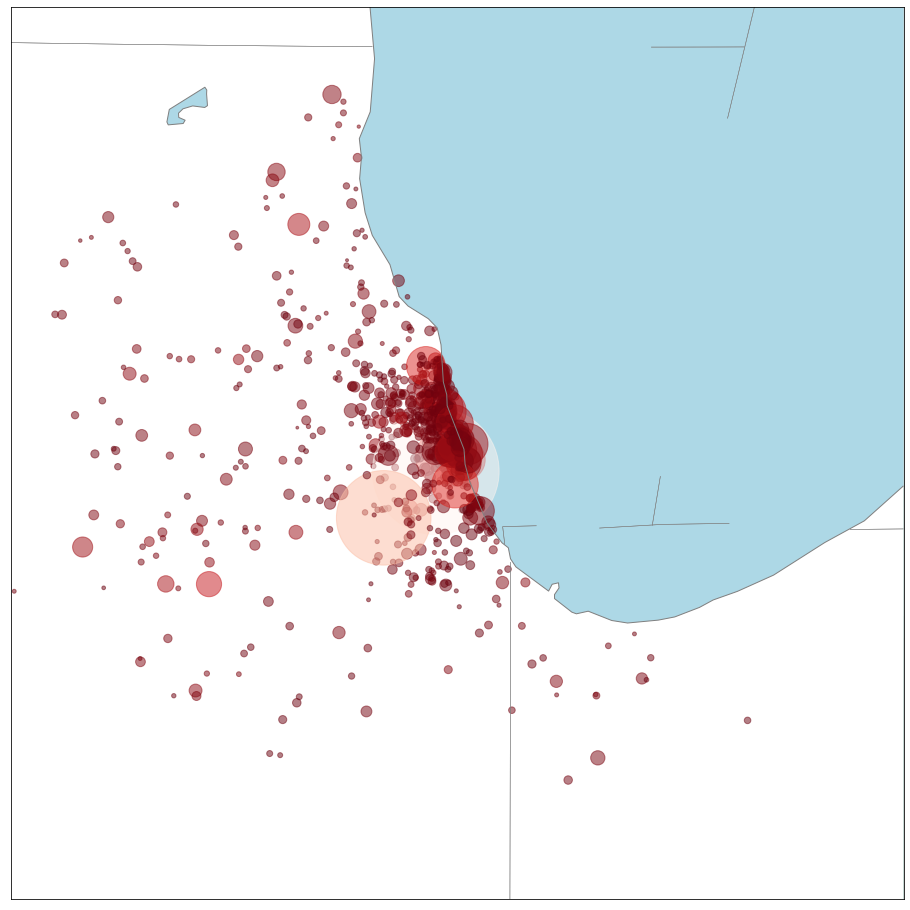

In [251]:
from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt

# Extract the data we're interested in
# lat = entropies['latitude'].values #.tolist() df.columns[cols]
# lon = entropies['longitude'].values #.tolist()
# entropies = entropies['entropy'].values #.tolist()
# visitors = entropies['raw_visitor_counts']#.values #.tolist()

#Next, we set up the map projection, scatter the data, and then create a colorbar and legend:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 32))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=41.8781, lon_0=-87.6298,
            width=1.5E5, height=1.5E5)
m.shadedrelief()
m.fillcontinents(color='white', lake_color='lightblue')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=entropies, s=visitors/4.0,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
# plt.colorbar(label=r'${\rm entropies}$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

In [ ]:
# plot the relationship between visitors and entropy 

# all pois

# each subtype of pois 



In [ ]:
# plot the relationship between distance and entropy 

# all pois

# each subtype of pois

In [ ]:
# plot the relationship between visitors and distance

# all pois

# each subtype of pois